# Assignment 4

## Classification using Support Vector Machine and KNN-Classifier

#### Aim: Write a script to implement Support Vector Machine Classifier for the given Dataset.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("E:\LABS\data_set\german_credit_data.csv", sep=",")
df

,sr,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [3]:
df = df.drop(['sr'], axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [4]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [5]:
df['Saving accounts'].fillna(df['Checking account'], inplace=True)
df['Checking account'].fillna(df['Saving accounts'], inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,little,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
label_encoder = LabelEncoder()

columns_to_encode = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,4
996,40,1,3,1,0,0,3857,30,1
997,38,1,2,1,0,0,804,12,5
998,23,1,2,0,0,0,1845,45,5


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
scaler = StandardScaler()

#### Exercise 1 and 3

* Implement a Support Vector Classifier.
* Train the model and predict the response for test dataset.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [11]:
X = df.drop("Purpose", axis=1)
y = df["Purpose"]

In [12]:
X_standardized = scaler.fit_transform(X)
X_standardized

array([[ 2.76645648,  0.67028006,  0.14694918, ..., -0.79318953,
        -0.74513141, -1.23647786],
       [-1.19140394, -1.49191369,  0.14694918, ..., -0.03632929,
         0.94981679,  2.24819436],
       [ 1.18331231,  0.67028006, -1.38377145, ..., -0.79318953,
        -0.41656241, -0.73866754],
       ...,
       [ 0.21583532,  0.67028006,  0.14694918, ..., -0.79318953,
        -0.87450324, -0.73866754],
       [-1.10345149,  0.67028006,  0.14694918, ..., -0.79318953,
        -0.50552769,  1.9992892 ],
       [-0.75164167,  0.67028006,  0.14694918, ..., -0.03632929,
         0.46245715,  1.9992892 ]])

In [13]:
min_max_scaler = MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)
X_normalized

array([[0.85714286, 1.        , 0.66666667, ..., 0.        , 0.05056674,
        0.02941176],
       [0.05357143, 0.        , 0.66666667, ..., 0.25      , 0.31368989,
        0.64705882],
       [0.53571429, 1.        , 0.33333333, ..., 0.        , 0.10157368,
        0.11764706],
       ...,
       [0.33928571, 1.        , 0.66666667, ..., 0.        , 0.03048311,
        0.11764706],
       [0.07142857, 1.        , 0.66666667, ..., 0.        , 0.08776274,
        0.60294118],
       [0.14285714, 1.        , 0.66666667, ..., 0.25      , 0.23803235,
        0.60294118]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

SVC()

In [16]:
y_pred = svc_classifier.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.345


#### Exercise 2

* Implement Linear, Radial, Polynomial and Gaussian Kernel and compare their performances.

In [18]:
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

y_pred_linear = svc_linear.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy with Linear Kernel:", accuracy_linear)

Accuracy with Linear Kernel: 0.375


In [19]:
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

y_pred_rbf = svc_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy with RBF Kernel:", accuracy_rbf)

Accuracy with RBF Kernel: 0.345


In [20]:
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)

y_pred_poly = svc_poly.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy with Polynomial Kernel:", accuracy_poly)

Accuracy with Polynomial Kernel: 0.315


In [21]:
svc_sigmoid = SVC(kernel='sigmoid')
svc_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = svc_sigmoid.predict(X_test)

accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("Accuracy with Sigmoid Kernel:", accuracy_sigmoid)

Accuracy with Sigmoid Kernel: 0.25


#### Exercise 4

* Generate Confusion matrix.

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

* for linear svc

In [23]:
cm_linear = confusion_matrix(y_test, y_pred_linear)

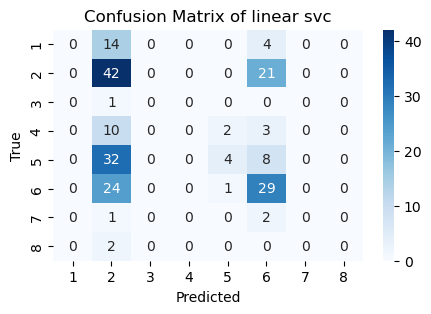

In [24]:
class_labels = range(1,9)

plt.figure(figsize=(5, 3))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of linear svc')
plt.show()

* for radial svc

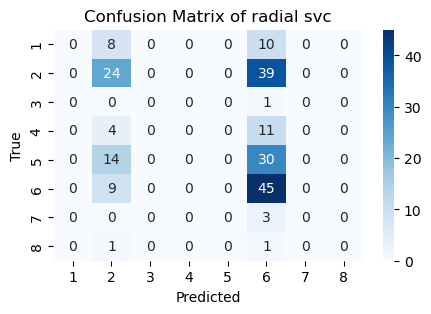

In [25]:
cm_linear = confusion_matrix(y_test, y_pred_rbf)

class_labels = range(1,9)

plt.figure(figsize=(5, 3))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of radial svc')
plt.show()

* for polynomial svc

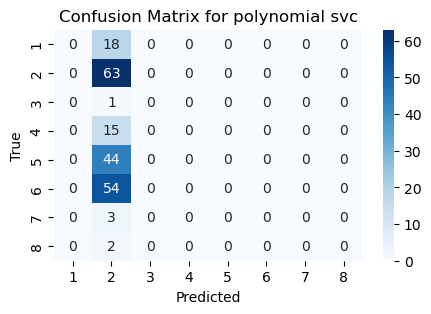

In [26]:
cm_linear = confusion_matrix(y_test, y_pred_poly)

class_labels = range(1,9)

plt.figure(figsize=(5, 3))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for polynomial svc')
plt.show()

* for sigmoid svc

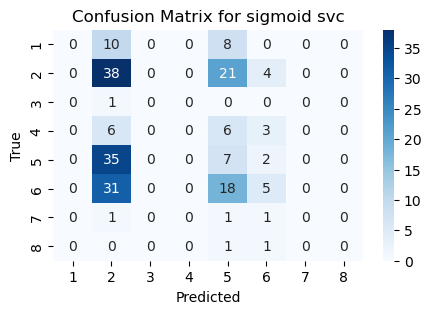

In [27]:
cm_linear = confusion_matrix(y_test, y_pred_sigmoid)

class_labels = range(1,9)

plt.figure(figsize=(5, 3))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for sigmoid svc')
plt.show()

#### Exercise 5

* Implement KNN-Classifier, Logistic Regression and compare tgeir performance with SVC “Accuracy, F1-Score, Precision and Recall”.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [29]:
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)
svc_y_pred = svc_classifier.predict(X_test)

# Calculate SVC metrics
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_f1 = f1_score(y_test, svc_y_pred, average='weighted')
svc_precision = precision_score(y_test, svc_y_pred, average='weighted')
svc_recall = recall_score(y_test, svc_y_pred, average='weighted')

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

# Calculate KNN metrics
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
knn_precision = precision_score(y_test, knn_y_pred, average='weighted')
knn_recall = recall_score(y_test, knn_y_pred, average='weighted')

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)

# Calculate Logistic Regression metrics
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')
lr_precision = precision_score(y_test, lr_y_pred, average='weighted')
lr_recall = recall_score(y_test, lr_y_pred, average='weighted')

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print("K-Nearest Neighbors (KNN) Metrics:")
print(f"Accuracy: {knn_accuracy}")
print(f"F1-Score: {knn_f1}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}\n")

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy}")
print(f"F1-Score: {lr_f1}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}\n")

print("Support Vector Classifier (SVC) Metrics:")
print(f"Accuracy: {svc_accuracy}")
print(f"F1-Score: {svc_f1}")
print(f"Precision: {svc_precision}")
print(f"Recall: {svc_recall}")

K-Nearest Neighbors (KNN) Metrics:
Accuracy: 0.305
F1-Score: 0.2782493606138107
Precision: 0.2665079365079365
Recall: 0.305

Logistic Regression Metrics:
Accuracy: 0.355
F1-Score: 0.2613949079089924
Precision: 0.225
Recall: 0.355

Support Vector Classifier (SVC) Metrics:
Accuracy: 0.375
F1-Score: 0.3039312915248744
Precision: 0.3475799573560768
Recall: 0.375


#### Exercise 6 
    
* Perform Grid Search Method for Hyperparameter Tuning for SVC and KNN.

In [18]:
from sklearn.model_selection import GridSearchCV

In [20]:
parameters = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001]}

grid_search = GridSearchCV(SVC(), param_grid=parameters, cv=10)
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_
best_svm_parameters = grid_search.best_params_

print("Best SVC Hyperparameters: ", best_svm_parameters)

Best SVC Hyperparameters:  {'C': 1, 'gamma': 0.001}


In [26]:
parameters_knn = {'n_neighbors': [3,5,7,9,10,20,50,100]}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid=parameters_knn, cv=10)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_parameters = grid_search_knn.best_params_

print("Best KNN Hyperparameters: ", best_knn_parameters)

Best KNN Hyperparameters:  {'n_neighbors': 20}


#### Exercise 7

* Generate ROC and Compare AUC for KNN and SVC.

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [32]:
svc_classifier = SVC(probability=True)
svc_classifier.fit(X_train, y_train)

SVC(probability=True)

In [34]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
roc_data_svc = {}
roc_data_knn = {}

# Get unique class labels
classes = np.unique(y)

In [38]:
for c in classes:
    # For SVC
    svc_probs = svc_classifier.predict_proba(X_test)
    fpr_svc, tpr_svc, _ = roc_curve(y_test == c, svc_probs[:, c])
    auc_svc = roc_auc_score(y_test == c, svc_probs[:, c])
    roc_data_svc[c] = (fpr_svc, tpr_svc, auc_svc)

    # For KNN
    knn_probs = knn_classifier.predict_proba(X_test)
    fpr_knn, tpr_knn, _ = roc_curve(y_test == c, knn_probs[:, c])
    auc_knn = roc_auc_score(y_test == c, knn_probs[:, c])
    roc_data_knn[c] = (fpr_knn, tpr_knn, auc_knn)

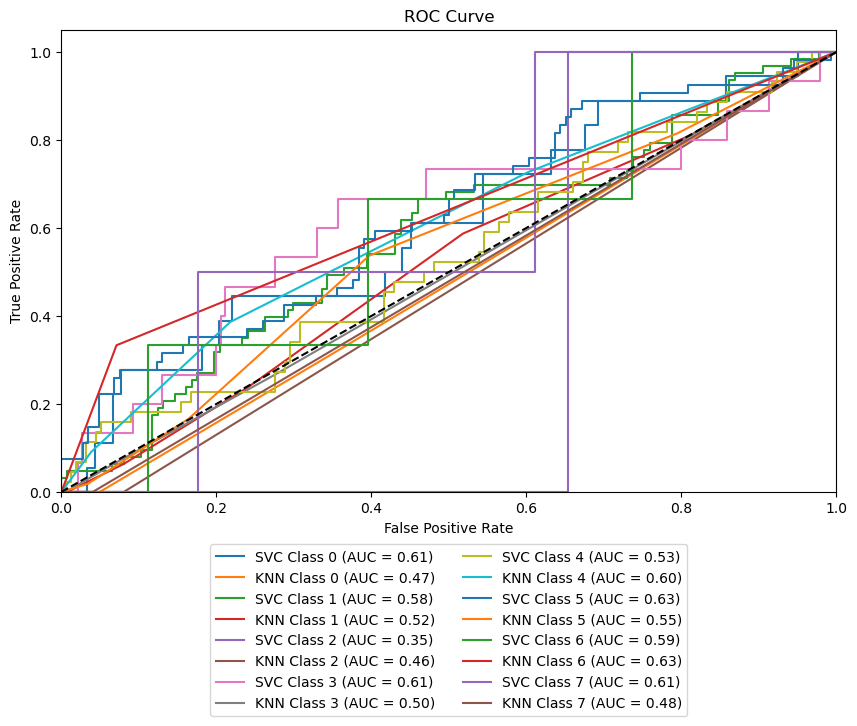

In [43]:
plt.figure(figsize=(10, 6))
for c in classes:
    fpr_svc, tpr_svc, auc_svc = roc_data_svc[c]
    fpr_knn, tpr_knn, auc_knn = roc_data_knn[c]

    plt.plot(fpr_svc, tpr_svc, label=f'SVC Class {c} (AUC = {auc_svc:.2f})')
    plt.plot(fpr_knn, tpr_knn, label=f'KNN Class {c} (AUC = {auc_knn:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=2)
plt.show()